Tarea 2.9
Ejercicio 1.4.2 del libro “Fundamentals of Numerical Computation: Julia Edition” de Driscoll y Braun.

Sea $f(x)=\frac{e^{x}-1}{x}$
ncuentre el número de condicionamiento. ¿Cuál es su máximo entre $-1\leq x\leq 1$?
Use el algoritmo obvio

(e**x - 1)/x

para calcular $f(x)$ para $x=10^{-2}, 10^{-3}, 10^{-4},...,10^{-8}$

Repita lo mismo usando en cambio los primeros ocho términos de la serie de Taylor
$f(x)\approx 1 + \frac{1}{2}x+\frac{1}{3!}x+...+\frac{1}{8!}x$

Haga una tabla de las diferencias relativas entre ambos métodos. ¿Cuál es más preciso y por qué?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

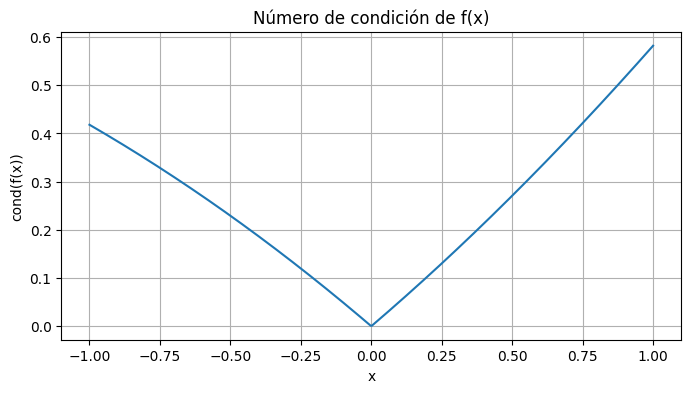

Máximo número de condición: 0.5819767068693265


In [5]:

# debido a que f(x)= (e**x - 1)/x es diferenciable, podemos calcular el numero de acondicionamiento con la formula Kf(x)=|xf'(x)/f(x)| por lo que primero calcularemos los f(x) y f'(x)
def f(x):
    return (np.exp(x) - 1) / x

#calculando f'(x) a mano, da de resultado ((x-1)*e**x +1)/x**2
def df(x):
    return ((x-1)*np.exp(x)+1)/x**2

#Numero de acondicionamiento: kf(x) = |xf'(x)/f(x)|
def num_acond(x):
    return np.abs(x*df(x)/f(x))

#Evaluamos entre -1 y 1
valor_x = np.linspace(-1, 1, 500)
valor_acondicionamiento = num_acond(valor_x)

#Finalmente graficamos
plt.figure(figsize=(8, 4))
plt.plot(valor_x, valor_acondicionamiento)
plt.title("Número de condición de f(x)")
plt.xlabel("x")
plt.ylabel("cond(f(x))")
plt.grid(True)
plt.show()

print("Máximo número de condición:", np.max(valor_acondicionamiento))

Podemos apreciar un punto donde el numero de acondicionamiento pierde presición porque $f(x)=e^{x}-1$ resta dos valores muy cercanos cuando se evalua a 0

In [7]:
#para calcular el algoritmo obvio:
x_dos = np.array([10**(-k) for k in range(2, 9)])

def f_obvio(x):
    return (np.exp(x) - 1) / x

f_obvio_valor = f_obvio(x_dos)
print(f_obvio_valor)

[1.00501671 1.00050017 1.00005    1.000005   1.0000005  1.00000005
 0.99999999]


In [8]:
#para calcular los primeros ocho terminos de la serie de taylor:
def f_taylor(x, n=8):
    result = 0
    for n in range(n):
        result += x**n / math.factorial(n + 1)
    return result

f_taylor_valor = np.array([f_taylor(xi) for xi in x_dos])
print(f_taylor_valor)


[1.00501671 1.00050017 1.00005    1.000005   1.0000005  1.00000005
 1.        ]


In [11]:
#para saber cual es más preciso, calcularemos su error relativo: |(f_taylor - f_obvio)/f_obvio|
error_relativo = np.abs((f_taylor_valor - f_obvio_valor) / f_obvio_valor)

# Crear una tabla para mostrar resultados
df = pd.DataFrame({
    "x": x_dos,
    "f_obvio": f_obvio_valor,
    "f_taylor": f_taylor_valor,
    "error_relativo": error_relativo})

print(df)


              x   f_obvio  f_taylor  error_relativo
0  1.000000e-02  1.005017  1.005017    1.060494e-14
1  1.000000e-03  1.000500  1.000500    4.283319e-14
2  1.000000e-04  1.000050  1.000050    4.325213e-13
3  1.000000e-05  1.000005  1.000005    9.701746e-12
4  1.000000e-06  1.000000  1.000001    3.798315e-11
5  1.000000e-07  1.000000  1.000000    5.663214e-10
6  1.000000e-08  1.000000  1.000000    1.107747e-08


La serie de Taylor presenta resultados más cercanos a 0, por lo que es más precisa